In [43]:
# 9_plots_splicing_time.ipynb
# Ashley Mae Conard
# Last Mod. 9/12/2019
# Purpose: Plot alternative splicing genes within categories (all females, all males, females sex specific, male sex specific, female all rest, male all rest, female non-sex specific, male non-sex specific, female new sex specific, male new sex specific) over time.

# Libraries
import pandas as pd
pd.set_option('display.max_colwidth',-1)
import mygene
import glob
import collections as c
import os
import sys
from io import StringIO
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from biothings_client import get_client

In [100]:
INPUTFILE_PSI = "/data/compbio/aconard/splicing/results/suppa_results_ncbi_trans/merged_0-2_cf_cm/clampRNAi_diffSplice.dpsi"
INPUTFILE_DTU = "/data/compbio/aconard/splicing/results/suppa_results_ncbi_trans/merged_0-2_cf_cm/clampRNAi_diffSplice_iso_dtu.dpsi"
MEASURE = "PSI}"#"PSI"
OUTDIR = "/data/compbio/aconard/splicing/results/suppa_results_ncbi_trans/merged_0-2_cf_cm/"
TITLE_OUTPUT = "0-2_cf_cm"
TITLE_PLOT = "0-2 Female vs. Male controls" # clamp RNAi vs.

In [95]:
df = pd.read_csv(INPUTFILE_DTU, sep="\t")
df["nlog10_pval"] = -np.log10(df["clampRNAi_iso_events-control_iso_events_p-val"])

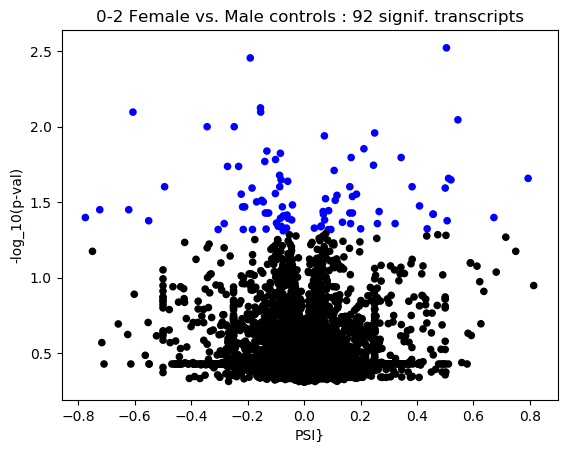

In [98]:
cols = np.where(df["nlog10_pval"]>=1.301029995664,'b','k')
df.plot.scatter(c = cols, x='clampRNAi_iso_events-control_iso_events_dPSI',
                   y='nlog10_pval')

plt.title('%s : %s signif. transcripts'%(TITLE_PLOT, cols.tolist().count('b')))
plt.xlabel(MEASURE)
plt.ylabel('-log_10(p-val)')
 
# Show graphic
plt.savefig(OUTDIR+"/"+TITLE_OUTPUT+"_volcano.pdf")

In [59]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
%matplotlib inline
fmri = sns.load_dataset("fmri")

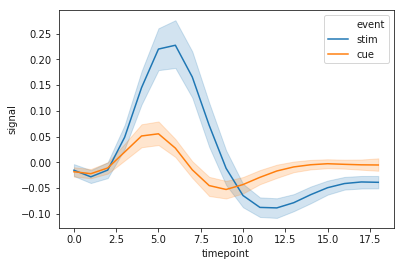

In [60]:
axa = sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri)

In [58]:
INPUTDIR = "/data/compbio/aconard/splicing/final_matrices/"
pval = "clampRNAi_iso_events-control_iso_events_p-val"
PSI = "clampRNAi_iso_events-control_iso_events_dPSI" 
pvaldtu = "clampRNAi_iso_tpm-control_iso_tpm_p-val"
DTU = "clampRNAi_iso_tpm-control_iso_tpm_dPSI" 

In [69]:
OUTDIR = "/data/compbio/aconard/splicing/"

In [62]:
df9_0_2_psi = pd.read_csv(INPUTDIR+"/df9_0_2_psi.tsv", sep="\t")
df9_0_2_psi = df9_0_2_psi.set_index(list(df9_0_2_psi)[0])
df9_0_2_psi['sex_new'] = df9_0_2_psi['sex'].str.split(':').str[0]
df9_0_2_psi.index.name = None

df9_2_4_psi = pd.read_csv(INPUTDIR+"/df9_2_4_psi.tsv", sep="\t")
df9_2_4_psi = df9_2_4_psi.set_index(list(df9_2_4_psi)[0])
df9_2_4_psi['sex_new'] = df9_2_4_psi['sex'].str.split(':').str[0]
df9_2_4_psi.index.name = None

df9_0_2_dtu = pd.read_csv(INPUTDIR+"/df9_0_2_dtu.tsv", sep="\t")
df9_0_2_dtu = df9_0_2_dtu.set_index(list(df9_0_2_dtu)[0])
df9_0_2_dtu['sex_new'] = df9_0_2_dtu['sex'].str.split(':').str[0]
df9_0_2_dtu.index.name = None

df9_2_4_dtu = pd.read_csv(INPUTDIR+"/df9_2_4_dtu.tsv", sep="\t")
df9_2_4_dtu = df9_2_4_dtu.set_index(list(df9_2_4_dtu)[0])
df9_2_4_dtu['sex_new'] = df9_2_4_dtu['sex'].str.split(':').str[0]
df9_2_4_dtu.index.name = None

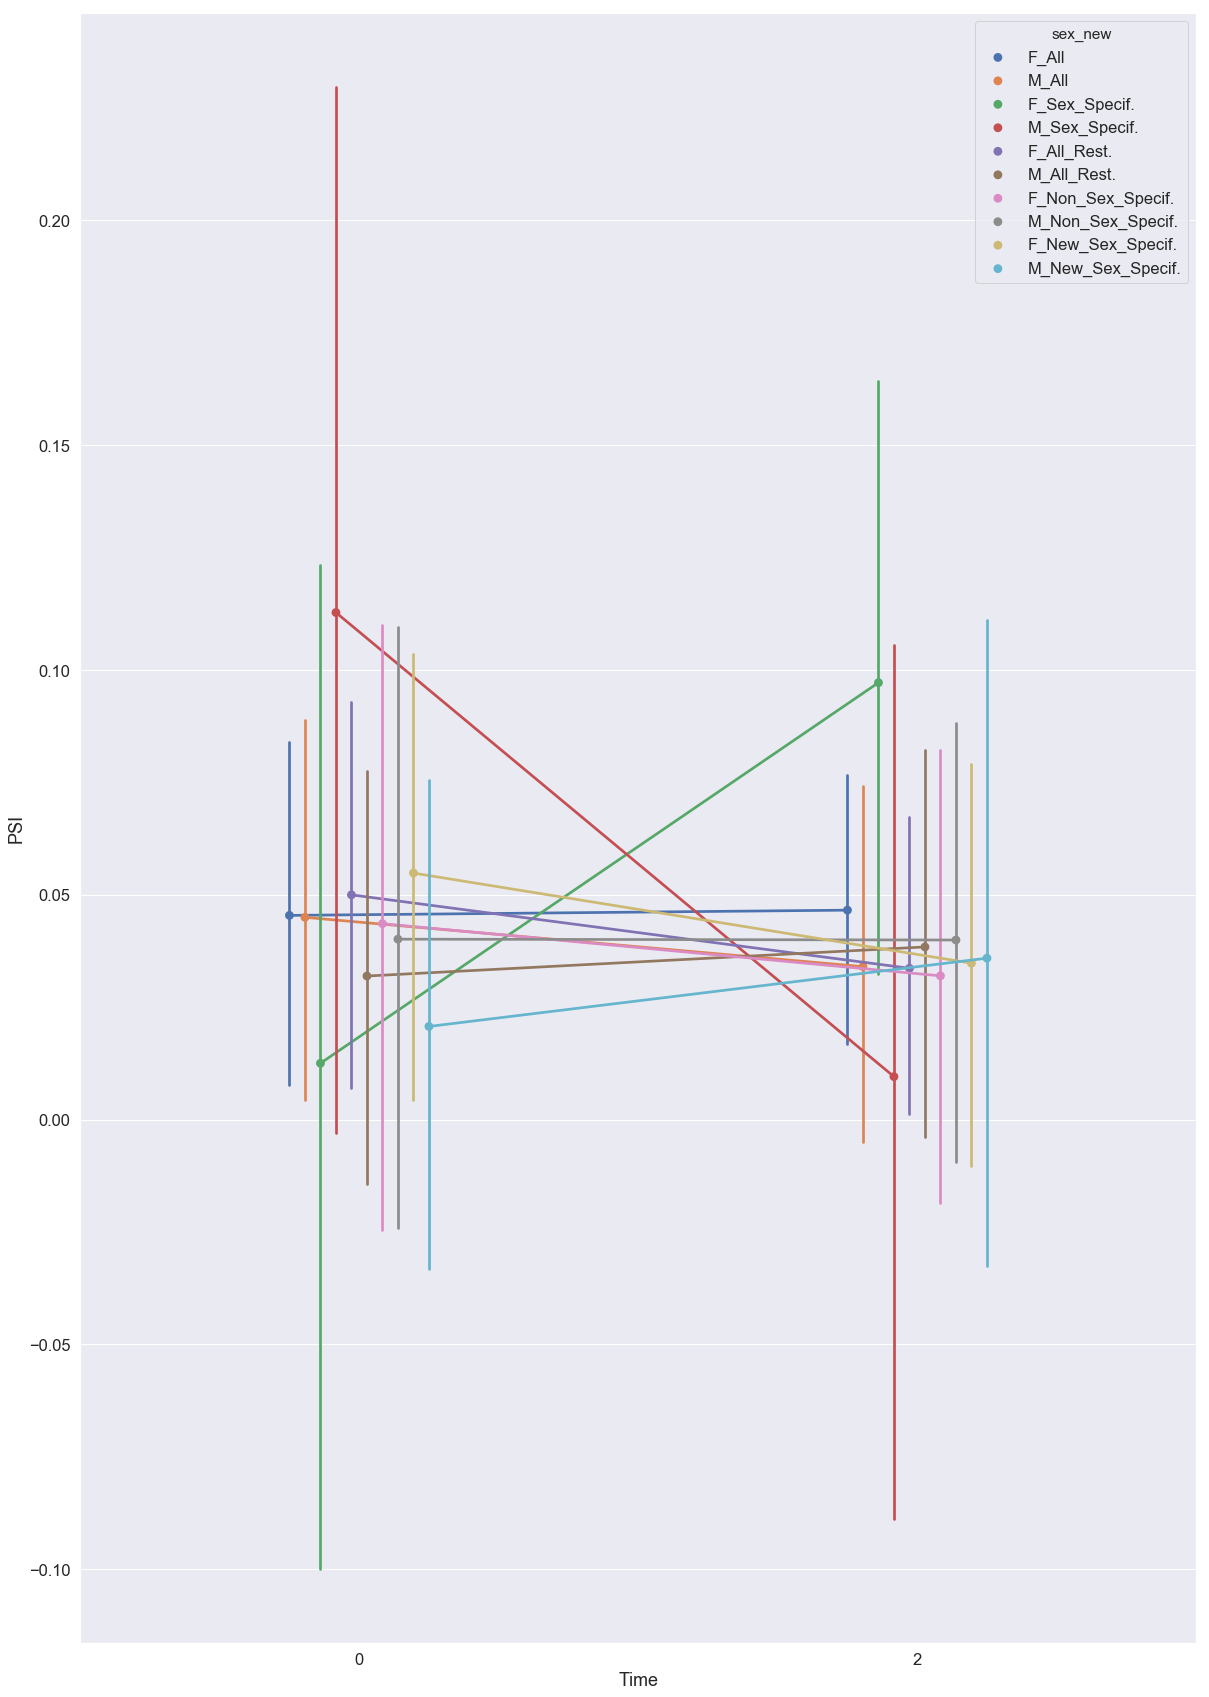

In [73]:
# PSI
df9_0_2_psi['time'] = 0
df9_2_4_psi['time'] = 2
df_0_4_psi = df9_0_2_psi.append(df9_2_4_psi)
sns.set(style="whitegrid")
# Make boxplot for one group only
sns.set(font_scale = 1.5)
f = plt.figure(figsize=(20,30))
ax = f.add_subplot(111)

sns.pointplot(x="time", y=PSI,hue="sex_new", data=df_0_4_psi, dodge=True, join=True)# , legend_out = True)

#ax.get_legend().set_visible(False)
ax.set(xlabel='Time', ylabel='PSI')
plt.savefig(OUTDIR+"/0-4_pointplot_long_PSI.pdf")
plt.show()

In [77]:
df_0_4_dtu

,clampRNAi_iso_tpm-control_iso_tpm_dPSI,clampRNAi_iso_tpm-control_iso_tpm_p-val,sex,sex_new,time
FBgn0000071;FBtr0081618,-0.326283,0.018482,F_All:827,F_All,0
FBgn0000071;FBtr0081619,0.653588,0.010490,F_All:827,F_All,0
FBgn0000071;FBtr0081620,-0.327305,0.018482,F_All:827,F_All,0
FBgn0000109;FBtr0089420,-0.215399,0.014236,F_All:827,F_All,0
FBgn0000109;FBtr0346440,0.210273,0.014236,F_All:827,F_All,0
FBgn0000228;FBtr0079084,-0.115354,0.032343,F_All:827,F_All,0
FBgn0000228;FBtr0302567,0.214438,0.017483,F_All:827,F_All,0
FBgn0000228;FBtr0302568,-0.203372,0.017483,F_All:827,F_All,0
FBgn0000228;FBtr0310625,0.126754,0.031469,F_All:827,F_All,0
FBgn0000259;FBtr0073561,-0.180572,0.009990,F_All:827,F_All,0


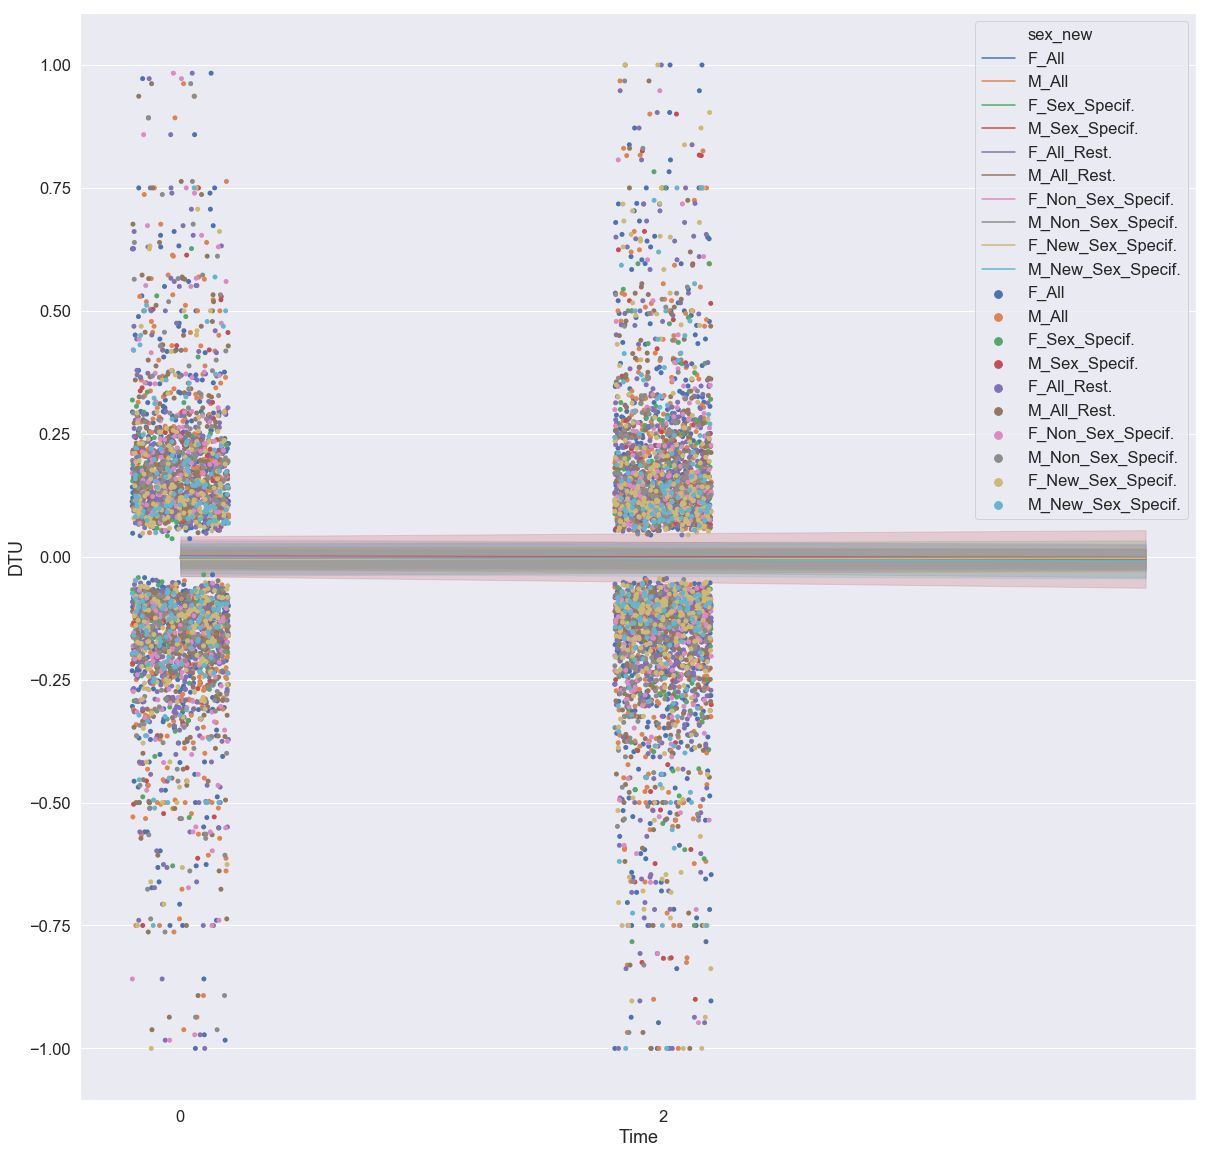

In [85]:
# DTU
df9_0_2_dtu['time'] = 0
df9_2_4_dtu['time'] = 2
df_0_4_dtu = df9_0_2_dtu.append(df9_2_4_dtu)
sns.set(style="whitegrid")
# Make boxplot for one group only
sns.set(font_scale = 1.5)
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(111)
sns.stripplot(x="time", y=DTU,hue="sex_new", data=df_0_4_dtu, jitter=True)
sns.lineplot(x="time", y=DTU,hue="sex_new", data=df_0_4_dtu)# dodge=True, join=True, legend_out = True)

#ax.get_legend().set_visible(False)
ax.set(xlabel='Time', ylabel='DTU')
plt.savefig(OUTDIR+"/0-4_lineplot_DTU.pdf")
plt.show()